In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras 
from keras import utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications import InceptionV3


In [2]:
path = "D:\\Projects\\Bone Fracture Classifier\\Dataset\\"

In [3]:

train_data = utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)
validation_data = utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42,
)
label = train_data.class_names


Found 1129 files belonging to 10 classes.
Using 1017 files for training.
Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [4]:
def preprocess(img):
    img = tf.cast(img, "float32") / 255.0
    return img
train_dataset = train_data.map(lambda x, y: (preprocess(x), y))
val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))

In [5]:
x_train = []
y_train = []
for images, labels in train_dataset:
        x_train.append(images.numpy())
        y_train.append(labels.numpy())
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [6]:
x_val = []
y_val = []
for images, labels in val_dataset:
    x_val.append(images.numpy())
    y_val.append(labels.numpy())
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [7]:
Num_Labels = len(label)
y_train = utils.to_categorical(y_train, Num_Labels)
y_val = utils.to_categorical(y_val, Num_Labels)

In [2]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [13]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 571ms/step - accuracy: 0.9960 - loss: 0.1040 - val_accuracy: 0.9554 - val_loss: 0.3244
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 577ms/step - accuracy: 0.9996 - loss: 0.0974 - val_accuracy: 0.9643 - val_loss: 0.2976
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 580ms/step - accuracy: 1.0000 - loss: 0.0851 - val_accuracy: 0.9643 - val_loss: 0.2847
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 575ms/step - accuracy: 1.0000 - loss: 0.0793 - val_accuracy: 0.9643 - val_loss: 0.2929
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 579ms/step - accuracy: 1.0000 - loss: 0.0715 - val_accuracy: 0.9643 - val_loss: 0.2855
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 577ms/step - accuracy: 1.0000 - loss: 0.0675 - val_accuracy: 0.9643 - val_loss: 0.2830
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 582ms/step - accuracy: 0.9990 - loss: 0.0625 - val_accuracy: 0.9643 - val_loss: 0.2945
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 581ms/step - accuracy: 1.0000 - loss: 0.0567 - val_accu

In [11]:
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 0.9586 - loss: 0.3550
Test Loss: 0.30289188027381897
Test Accuracy: 0.9642857313156128


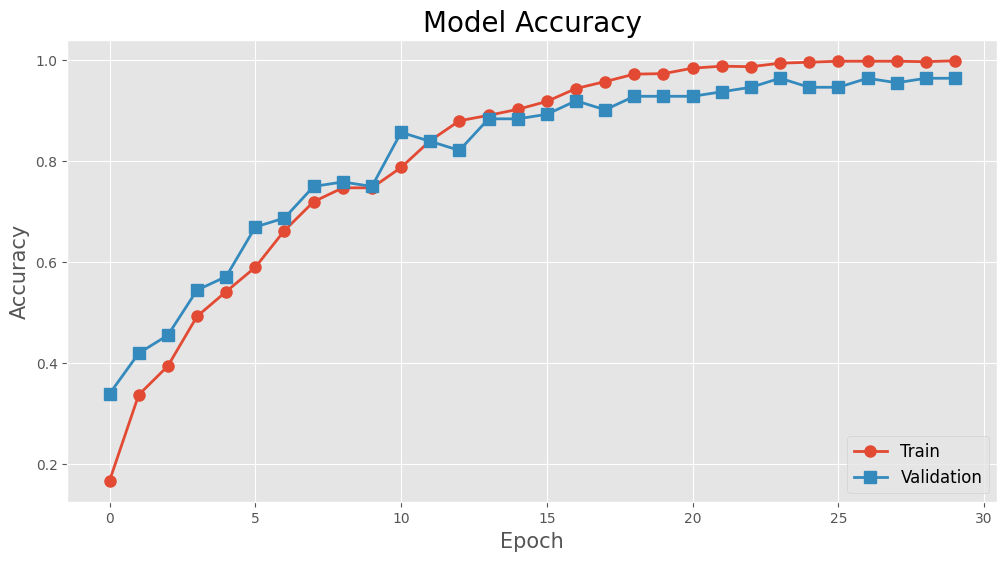

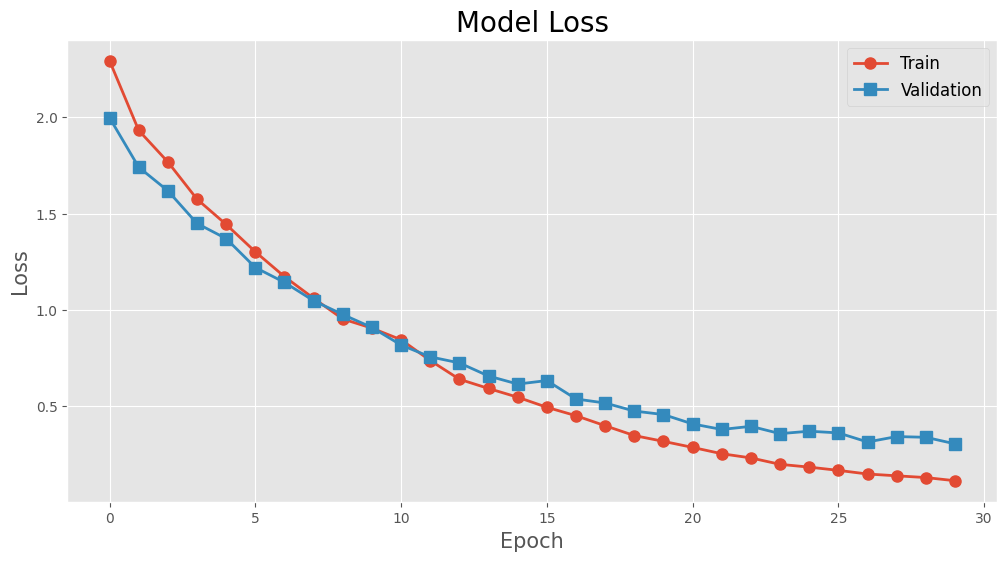

In [12]:
plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], 'o-', linewidth=2, markersize=8, label='Train')
plt.plot(history.history['val_accuracy'], 's-', linewidth=2, markersize=8, label='Validation')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], 'o-', linewidth=2, markersize=8, label='Train')
plt.plot(history.history['val_loss'], 's-', linewidth=2, markersize=8, label='Validation')
plt.title('Model Loss', fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.show()